In [1]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score
plt.rcParams["figure.figsize"] = (10, 7)
plt.rcParams["figure.dpi"] = 100

In [37]:
# Load the dataset
file_path = r'Algorithms/training_data.csv'
data = pd.read_csv(file_path)
data1=data.copy()
headers=list(data.columns)
# Display the first few rows of the dataframe
data.head()


import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
data_=data.iloc[:,:-1]
minmax.fit(data_)
data = pd.DataFrame(minmax.transform(data_),columns=headers[:-1])
data['increase_stock']=data1['increase_stock']

data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)
data.head()


,hour_of_day,day_of_week,month,holiday,weekday,summertime,temp,dew,humidity,precip,snow,snowdepth,windspeed,cloudcover,visibility,increase_stock,increase_stock_binary
0,5,5,1,0,0,0,-7.2,-15.0,53.68,0.0,0,0.0,16.3,31.6,16.0,low_bike_demand,0
1,21,4,1,0,1,0,-1.3,-12.8,40.97,0.0,0,0.0,23.9,85.7,16.0,low_bike_demand,0
2,21,3,8,0,1,1,26.9,21.8,73.39,0.0,0,0.0,0.0,81.1,16.0,low_bike_demand,0
3,1,6,1,0,0,0,3.1,-4.0,59.74,0.0,0,0.0,19.2,0.0,16.0,low_bike_demand,0
4,17,0,3,0,1,0,11.7,-11.4,18.71,0.0,0,0.0,10.5,44.6,16.0,low_bike_demand,0


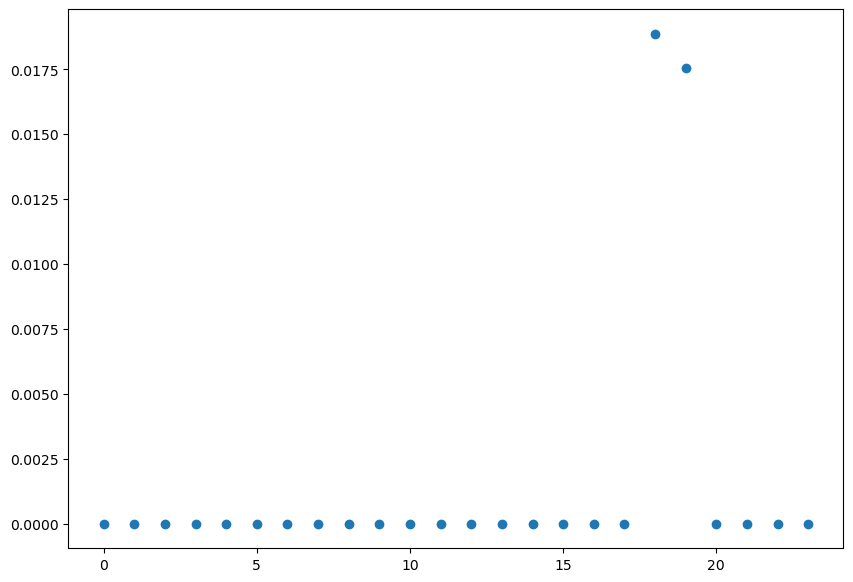

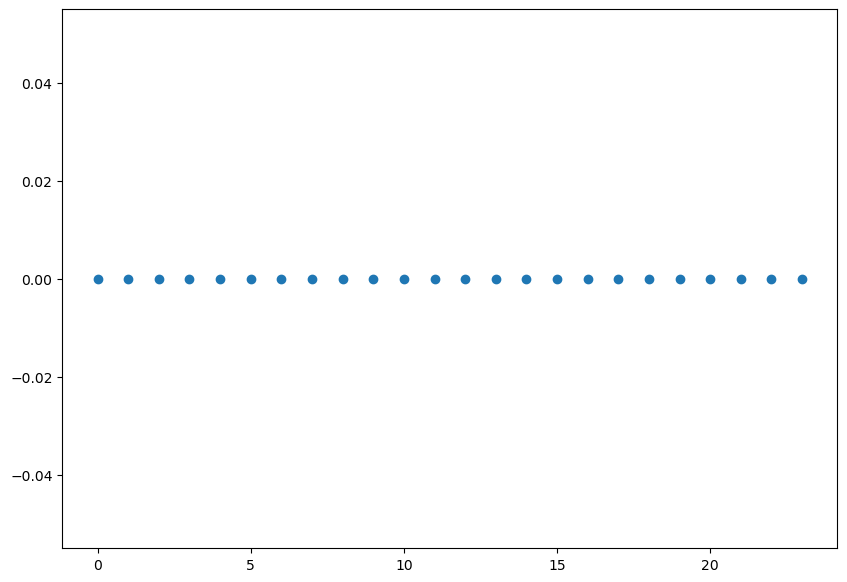

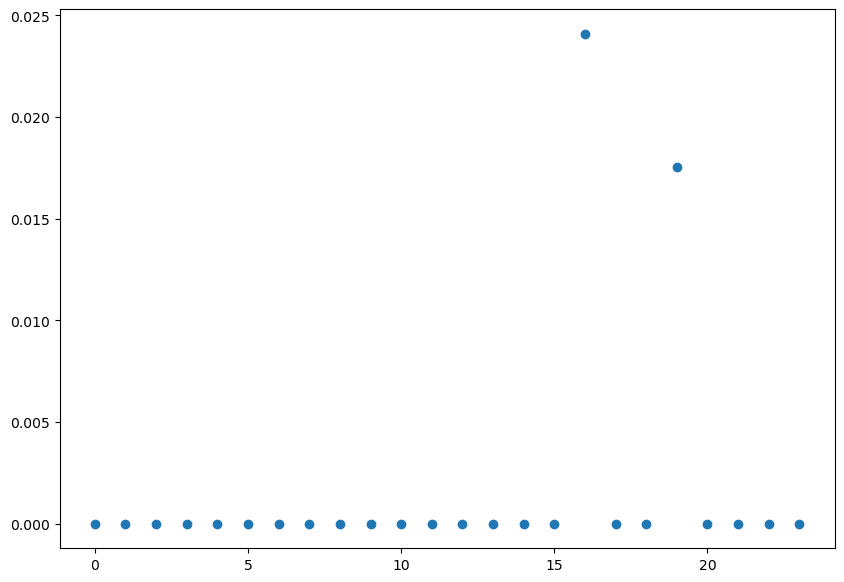

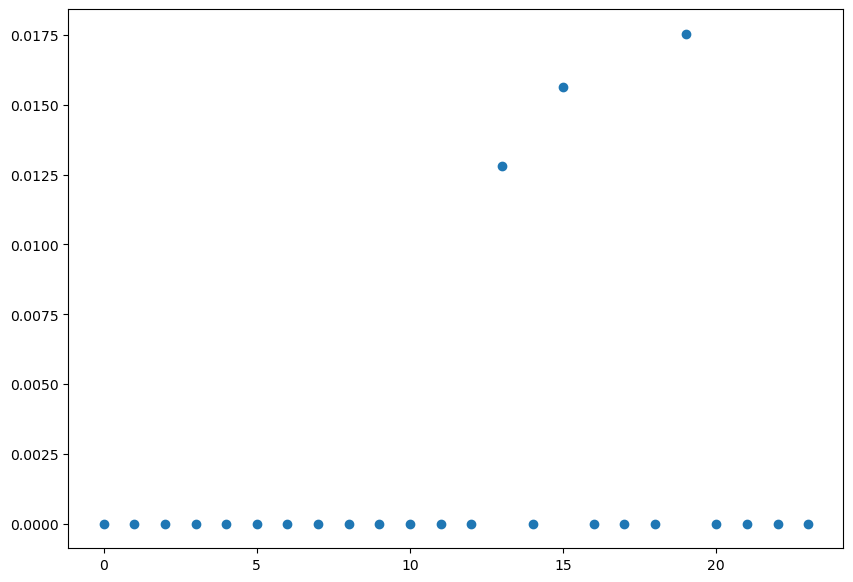

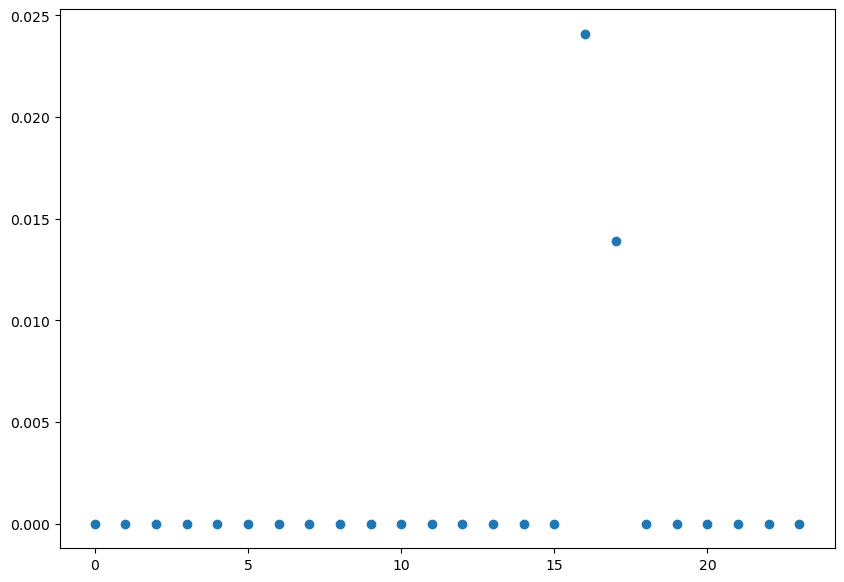

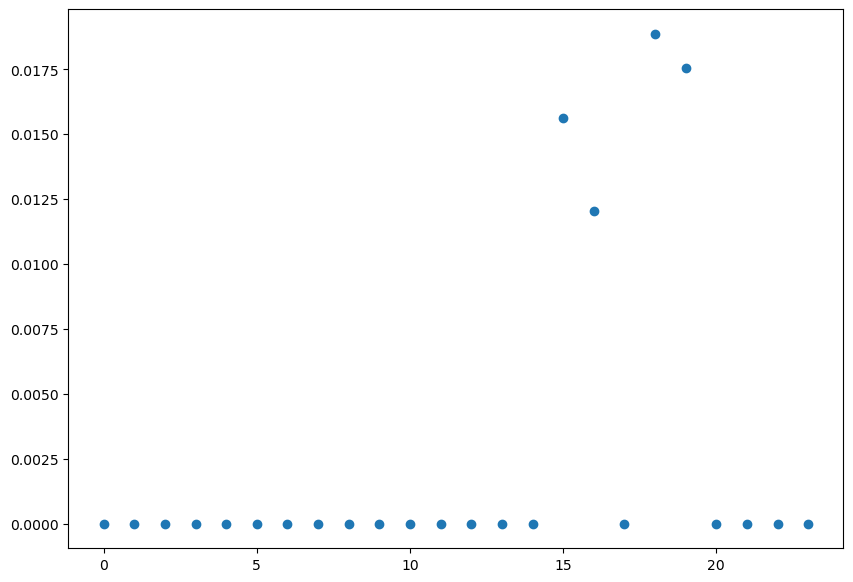

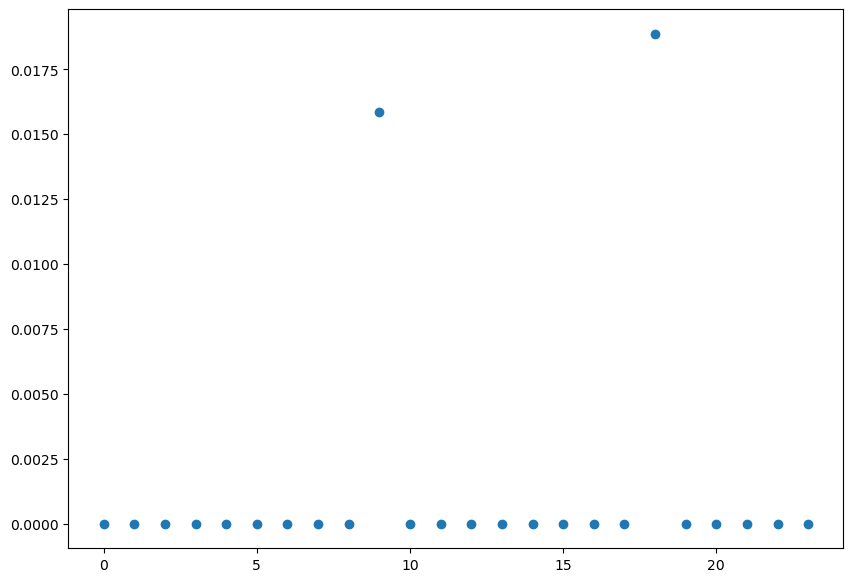

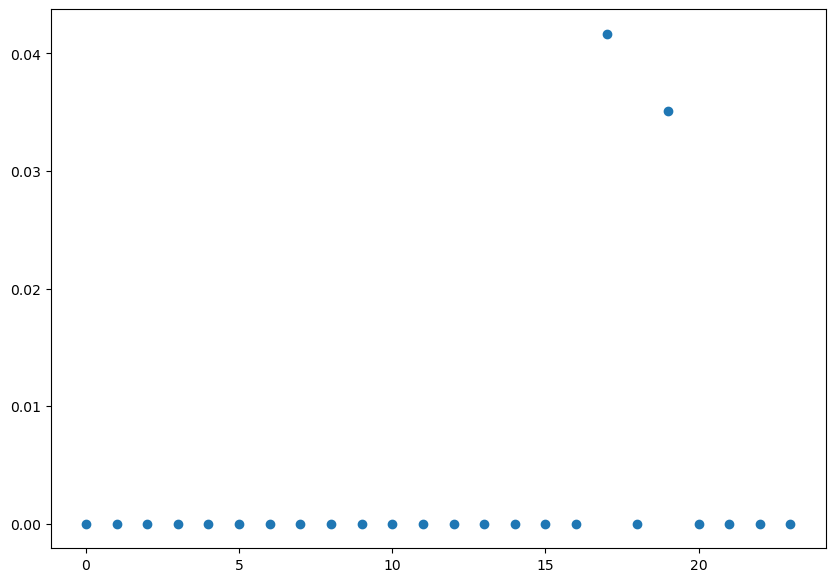

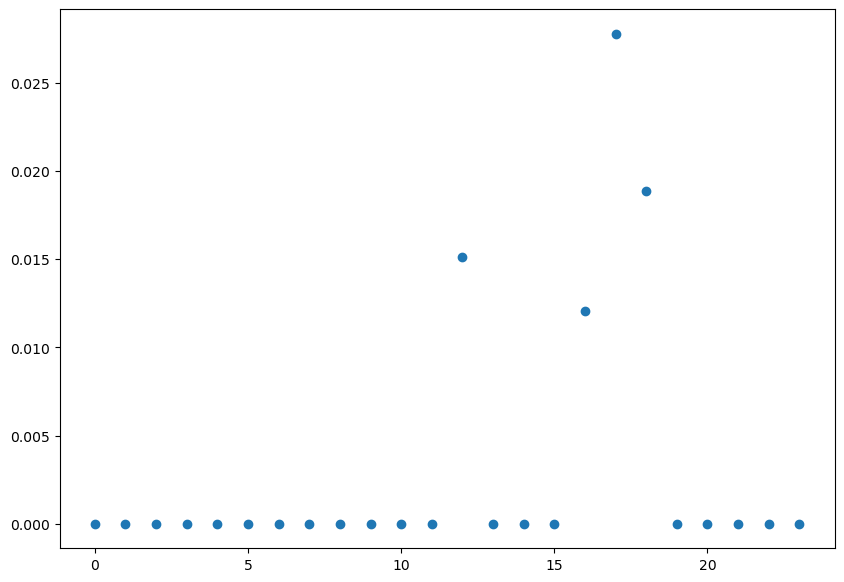

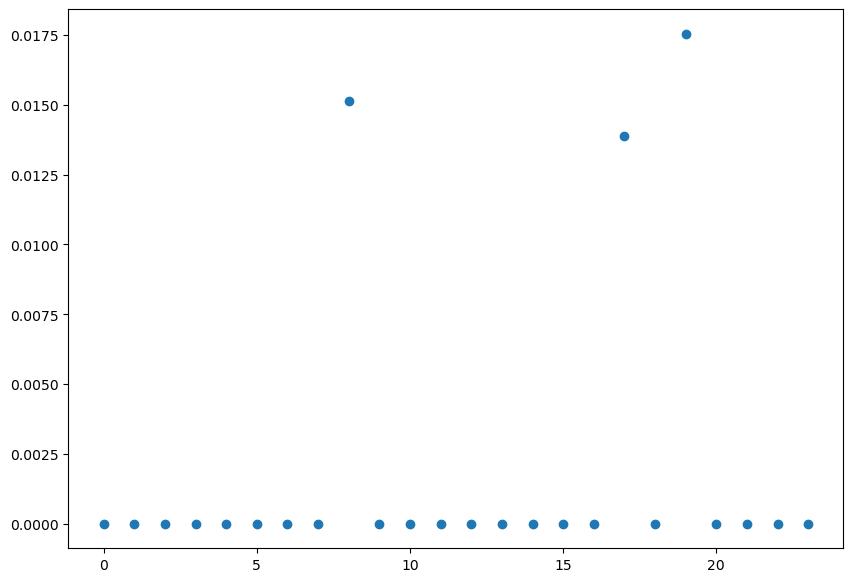

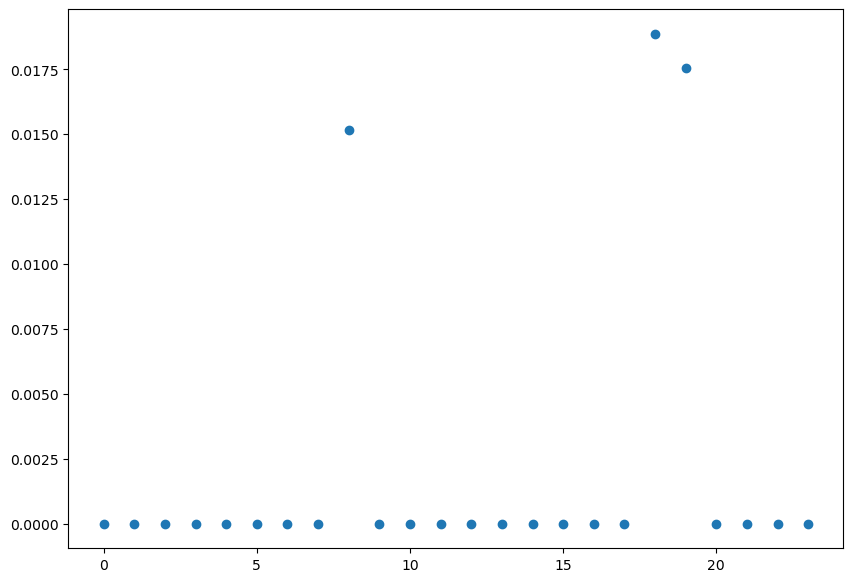

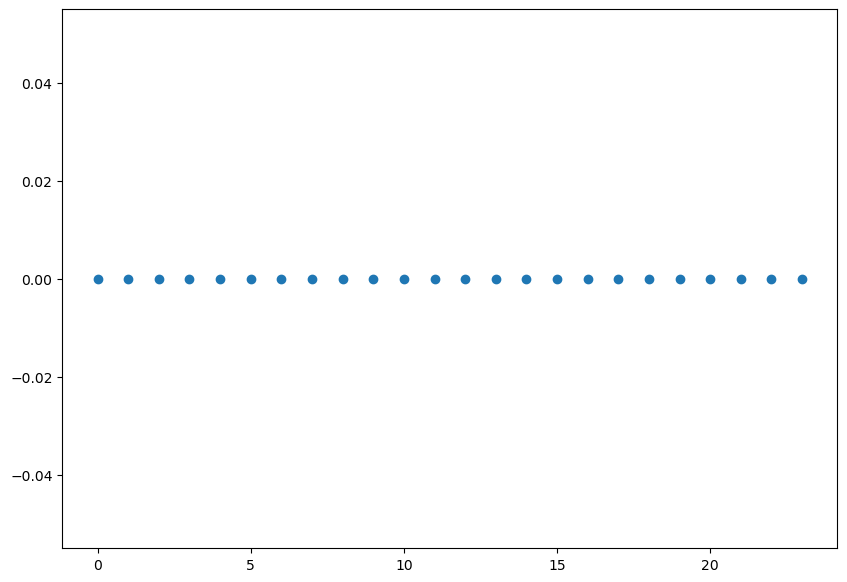

In [66]:
# 存储条件概率的列表
# fig, axs = plt.subplots(1,12)

# 计算每个 x 对应的条件概率
for m in range(1,13):
    conditional_probabilities = []
    for x in data['hour_of_day'].unique():
        # print(x)
        temp=len(data[(data['increase_stock_binary'] == 1) &
                    (data['hour_of_day'] == x) &
                    (data['day_of_week']==1) &
                    (data['month']==m)
                    ]
                )
        # print(temp)
        p_both =  temp/ len(data)
        p_precip = len(data[data['hour_of_day'] == x]) / len(data)
        p_conditional = p_both / p_precip
        conditional_probabilities.append(p_conditional)
    plt.figure()
    plt.scatter(data['hour_of_day'].unique(), conditional_probabilities, marker='o')


# 绘制折线图
# plt.scatter(data['hour_of_day'].unique(), conditional_probabilities, marker='o')
# plt.title('Conditional Probability of increase_stock_binary=1 given precip=x')
# plt.xlabel('hour_of_day')
# plt.ylabel('Conditional Probability')
# plt.show()


In [ ]:
np.log(conditional_probabilities)

In [ ]:
# 存储条件概率的列表
conditional_probabilities = []

# 计算每个 x 对应的条件概率
for x in data['precip'].unique():
    p_both = len(data[(data['increase_stock_binary'] == 1) & (data['precip'] == x)]) / len(data)
    p_precip = len(data[data['precip'] == x]) / len(data)
    p_conditional = p_both / p_precip
    conditional_probabilities.append(p_conditional)

# 绘制折线图
plt.scatter(data['precip'].unique(), conditional_probabilities, marker='o')
plt.title('Conditional Probability of increase_stock_binary=1 given precip=x')
plt.xlabel('precip')
plt.ylabel('Conditional Probability')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

high_demand_data = data[data['increase_stock_binary']  == 1]

[sum(data[data['precip']>0.05]['increase_stock_binary']),data[data['precip']<0.05]['increase_stock_binary']]



# 模拟数据df[df['precise'] > 0.5]
days = []
rain_data = []
# rain_data = [0, 4, 2, 1, 3]
# cloud_data = [3, 2, 1, 4, 0]

# 创建折线图
plt.scatter(data['precip'], data['increase_stock_binary'], label='rain', marker='o')
# plt.plot(days, rain_data, label='Rain', marker='o')
# plt.plot(days, cloud_data, label='Cloud', marker='o')

# 添加标题和标签
plt.title('Weather Information Over 5 Days')
plt.xlabel('Days')
plt.ylabel('Weather Intensity')

# 添加图例
plt.legend()

# 显示图表
plt.show()


# High demand
The histograms shows the number of observed instances of high demand, given some variable in the x-axis.

In [ ]:
# Filtering the data for only high bike demand (binary label = 1)
data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

high_demand_data = data[data['increase_stock_binary']  == 1]

# Plotting the distribution of each feature for high bike demand
# fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
# axes = axes.flatten()

# fig.suptitle("high demand", y=1, fontsize=30)
# for i, col in enumerate(high_demand_data.columns[:-1]): # excluding the last two columns (original and binary labels)
#     sns.histplot(high_demand_data[col], bins="auto", ax=axes[i], kde=False) 

# plt.tight_layout()
# plt.show()



In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(range(len(data1['snow'])), data1['snow'])
plt.title('Scatter Plot of Snow')
plt.show()
print(data1['snow'][:10])

# Low demand
The histograms shows the number of observed instances of low demand, given some variable in the x-axis.

In [ ]:
low_demand_data = data[data['increase_stock_binary'] == 0]
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

fig.suptitle("low demand", y=1, fontsize=30)
for i, col in enumerate(low_demand_data.columns[:-2]): # excluding the last two columns (original and binary labels)
    sns.histplot(low_demand_data[col], bins="auto", ax=axes[i], kde=False)

plt.tight_layout()
plt.show()

# Plotting low and high demand together
1 = high demand \
0 = low demand

In [ ]:
# Convert the 'increase_stock' column to binary for plotting, 
# data['increase_stock_binary'] = data['increase_stock'].apply(lambda x: 1 if x == 'high_bike_demand' else 0)

# Plotting correlations between inputs and the binary label
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(data.columns[:-1]): # excluding the last column which is the binary label
    sns.boxplot(x='increase_stock_binary', y=col, data=data, ax=axes[i])

plt.tight_layout()
plt.show()

## Observations
1. The increase for demand ishighest in the interval 15:00 - 19:00.
2. Friday is a high demand day.
3. The months has some influence. 
4. Demand is very high when it is not , but slightly higher 
5. 

In [8]:
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split

# 设置测试集大小为20%的原始数据， 设置random_state可以保证每次执行训练时，拆分得到的训练集和测试集都相同， random_state 可以设置成任意整数，只要每次训练使用的值相同即可
X_train, X_test, y_train, y_test=train_test_split(data.iloc[:,:-2],data.iloc[:,-1], test_size=0.2, random_state=0)


gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# 输出特征重要性得分
print("Feature importance scores:", gb.feature_importances_)

# 选择特征重要性得分排名前2的特征
selected_features = np.array(data.columns)[np.argsort(gb.feature_importances_)[::-1][:9]]
print("Selected features:", selected_features)


Feature importance scores: [4.88109352e-01 2.91003583e-02 1.63549532e-02 6.21649817e-03
 2.86927212e-02 1.46484929e-02 2.45696083e-01 3.06756315e-02
 8.73916584e-02 8.09137786e-03 0.00000000e+00 1.46256297e-04
 2.18554125e-02 1.63485137e-02 6.67269057e-03]
Selected features: ['hour_of_day' 'temp' 'humidity' 'dew' 'day_of_week' 'weekday' 'windspeed'
 'month' 'cloudcover']


In [9]:
select_columns=['hour_of_day', 'temp', 'humidity' ,'dew', 'day_of_week', 'weekday', 'windspeed',
 'month','cloudcover','increase_stock_binary']
data=data[select_columns]

In [12]:
ada = AdaBoostClassifier(random_state=0)
ada.fit(X_train, y_train)




AdaBoostClassifier(random_state=0)

In [10]:
from xgboost.sklearn import XGBClassifier


xgb = XGBClassifier(random_state=0)

xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [13]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=0)
ac=[]
model=ada
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_kf, y_train_kf)
    ac.append(accuracy_score(y_test_kf, model.predict(X_test_kf)))
print(np.mean(ac))
print("as",accuracy_score(y_test, model.predict(X_test)))
print(ac)

0.8765625


0.84375

In [16]:
from sklearn.model_selection import KFold
kf = KFold(5, shuffle=True, random_state=0)
ac=[]
model=xgb
for train_index, test_index in kf.split(X_train):
    X_train_kf, X_test_kf = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_kf, y_test_kf = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_kf, y_train_kf)
    ac.append(accuracy_score(y_test_kf, model.predict(X_test_kf)))
print(np.mean(ac))
print("as",accuracy_score(y_test, model.predict(X_test)))
print(ac)

0.89921875
as 0.871875
[0.8828125, 0.90234375, 0.91796875, 0.90234375, 0.890625]


### Reference

Freund Y , Schapire R E . A Decision-Theoretic Generalization of On-Line Learning and an Application to Boosting[J]. Journal of Computer and System Sciences, 1997, 55(1):119-139.


In [ ]:
https://blog.csdn.net/weixin_44750583/article/details/100096960